# Notebook 2: What makes a neruon fire?

Computational Biology 2 - WS 23/24

Notebooks are based on material created by Katharina Bracher.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Repetition
Here is an overview of yesterdays work. In this exercise the goal is to create a smoothed rate by convolving the binarized spike train with a kernel. 

In [5]:
data = np.load('./datasets/Data1.npz', allow_pickle=True)

v = data['V']
spike_times = data['SpikeTimes']
dt = data['dt'][0]
t_max = data['T'][0]
time = data['time']

# Bin size and discretized time for computing counts
dt_rate=500
spike_count_time = np.arange(0, t_max+1, dt_rate)

# Use histogram to compute counts
spike_counts = np.histogram(spike_times, spike_count_time)[0]

# For small time bins (dt), we get a binarized spike train
binarized_spike_train = np.histogram(spike_times, time)[0]

# Compute the firing rate, binned in intervals of length dtRate 
rate = 1000 * spike_counts / dt_rate #factor 1000: 1/ms -> 1/s
print(max(rate))

4.0


### Problem 1: Important Terms and Definitions
Before working on the Notebook answer the following questions:

- What is a random variable? What is a probability distribution?
- What is the value of an integral over a probabilty distribution (over all possible realizations)?
- What is the mean and the standard deviation of a probability distribution? 
- What is the connection between standard deviation and variance?
- What is the distribution of a Gaussian random variable with mean 2 and variance 4?
- What is a sample? What is the sample size?
- What is the difference between independent and correlated random variables?

![Convolution 2](http://upload.wikimedia.org/wikipedia/commons/9/9c/Convolution_Animation_%28Gaussian%29.gif)

### Problem 2: Construction of a Gaussian Kernel
Use a (non-normalized) Gaussian for the kernel, 
$$ K(s) = e^{\frac{-s^2}{2\sigma^2}} $$ ,
truncated at $\pm 3\sigma$.
Plot two kernels with different $\sigma$. Normalize $K$ such that the area under the kernel is one.

### Problem 3: Convolution of a spike train
Convolve the binarized spike train with the kernel and add it to the overview below. Do the same for the second kernel. How does $\sigma$ of the kernel influence the smoothed rate?

In [8]:
# Make a smoothed rate by convolving BinarizedSpikeTrain with a kernel, 
# How do you need to include the conversion factor from ms to s and the step size dt?




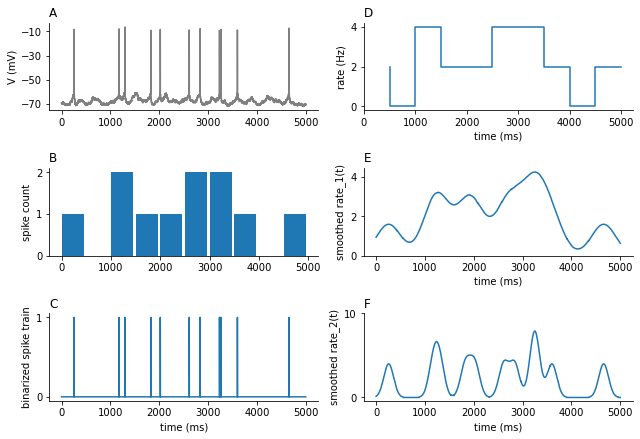

In [56]:
plt.subplots(figsize=(9, 6.2))
                         
plt.subplot(3,2,1)
plt.plot(time,V,color='gray')
plt.yticks([-70,-50,-30,-10])
#plt.xlabel('time (ms)')
plt.ylabel('V (mV)')
plt.title('A',loc='left')
sns.despine()
plt.tight_layout()

                         
plt.subplot(3,2,3)
plt.bar(SpikeCountTime[:-1],SpikeCounts,width=.9*dtRate,align='edge')
#plt.xlabel('time (ms)')
plt.ylabel('spike count')
plt.title('B',loc='left')
plt.yticks([0,1,2])
sns.despine()
plt.tight_layout()

plt.subplot(3,2,5)
plt.plot(time[:-1],BinarizedSpikeTrain)
plt.xlabel('time (ms)')
plt.ylabel('binarized spike train')
plt.yticks([0,1])
plt.title('C',loc='left')
sns.despine()
plt.tight_layout()
                    
plt.subplot(3,2,2)
#plt.plot(SpikeCountTime[1:],Rate,'-o')
plt.step(SpikeCountTime[1:],Rate)
#plt.bar(SpikeCountTime[:-1],Rate,width=.9*dtRate,align='edge')
plt.xlabel('time (ms)')
plt.ylabel('rate (Hz)')
plt.xlim(left=0)
plt.yticks([0,2,4])
plt.title('D',loc='left')
sns.despine()
plt.tight_layout()

# Add two plots of the rate smoothed with different kernels to the lower right corner       
plt.subplot(3,2,4)
plt.plot(time[:-1],SmoothedRate)
plt.xlabel('time (ms)')
plt.ylabel('smoothed rate_1(t)')
plt.ylim(bottom=0)
plt.title('E',loc='left')
sns.despine()
plt.tight_layout()

plt.subplot(3,2,6)
plt.plot(time[:-1],SmoothedRate2)
plt.xlabel('time (ms)')
plt.ylabel('smoothed rate_2(t)')
plt.yticks([0,10])
plt.title('F',loc='left')
sns.despine()
plt.tight_layout()

---

### Problem 4: White Noise

Build an approximate white-noise stimulus by generating a sample of independent random numbers drawn from a Gausian probabilty distribution. How are the size of the time bin and the variance of the distribution connected?

Plot the stimulus over time, plot a histogram of the samples, its autocorrelation function and power spectrum. 

Functions that might be helpful are NumPy's `np.correlate` and `plt.psd` from matplotlib. Discuss how well this stimulus matches an ideal white-noise stimulus.

---

### Problem 5: Spike-Triggered Average

- Study the following cells of Python code.
- Answer/Discuss: What is the spike-triggered average?

<img src="https://www.researchgate.net/publication/316079311/figure/fig3/AS:635210429378561@1528457376624/Calculating-spike-triggered-average.png" width="500">

The data to this example is from Rokem et al. (2006) _J Neurophysiol_. The stimulus is a pure tone whose amplitude is modulated by Gaussian white-noise, up to a cut-off frequency of 200 Hz. The electrophysiological recording contains spike times of a grasshopper primary auditory receptor.<br/>

The data is stored in two text files `grasshopper_spike_times1.txt` and `grasshopper_stimulus1.txt`, which we can load easily with numpy's `np.loadtxt()` function. The time is stored in microseconds, we transform it to milliseconds.

In [38]:
spike_times = np.loadtxt('./datasets/grasshopper_spike_times1.txt')
stimulus = np.loadtxt('./datasets/grasshopper_stimulus1.txt')
stimulus_times = stimulus[:, 0]

# time points in the data are in micro s, transform them to milli s
conversion_factor = 1000
stimulus_times /= conversion_factor
spike_times /= conversion_factor

# stimulus is stored in volt, tranform to dB
def volt2dB(stim, maxdB=100):
    stim = (20 * 1 / np.log(10)) * (np.log(stim[:, 1] / 2.0e-5))
    return maxdB - stim.max() + stim
stimulus = volt2dB(stimulus, maxdB=76.4286)  # maxdB was taken from the spike file header

Here you can see the stimulus over time together with the spike times.

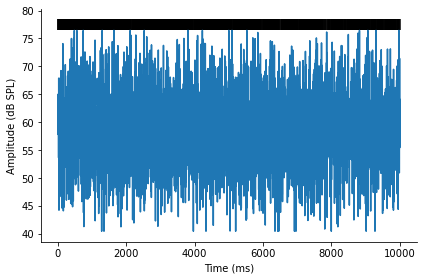

In [39]:
plt.plot(stimulus_times, stimulus)
plt.vlines(spike_times, max(stimulus), max(stimulus)+2, color='k')

plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (dB SPL)')
sns.despine()
plt.tight_layout()

### Problem 6: Visualization
Make a second plot where you only plot a short time frame of the data. For example, to plot the first 200 ms only, we need to slice the arrays to the appropriate length. For this we need to find the index of the time point 200 ms in the data. We can do this using numpy's `np.searchsorted()` or `np.where()` function.

In [40]:
np.where(stimulus_times==200)[0][0]

4000

In [41]:
np.where(spike_times<=200)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),)

In [42]:
spike_times[26]

198.6

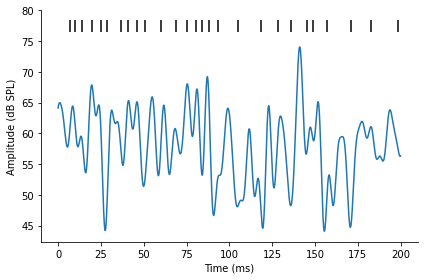

### Problem 7:  Compute the spike-triggered average (STA) stimulus for a grasshopper auditory neuron.
Determine and plot this STA for, e.g., a time window that starts 10 ms before a spike and ends when the neuron fires. Use `np.searchsorted()` to find the index corresponding to this time window.
An easy way to calculate the STA is to 
1. loop over spike times, get the index of the timepoint the spike occured
2. cut out the stimulus pieces in the time window before each spike
3. append them to an empty list, and
4. use `np.mean()` to get the average.

Plot the result with the correct x-axis (time). What do you observe when you change the time window to 20 or 100ms? Which features in the stimulus seem to trigger a spike? What might be the reason that directly before a spike (last 5 ms) the stimulus amplitude does not seem to matter? What happens if you change the duration of the analyzed response? 

In [44]:
np.searchsorted(stimulus_times, 10)

200

In [45]:
np.searchsorted(stimulus_times, spike_times[:5])

array([134, 198, 278, 402, 500])

In [62]:
window = 10 # ms



time step is always 0.05 ms
bins in time window 200
spike_times: [13.9 20.1 25.  28.4 37. ] ...
new spike_times: [13.9 20.1 25.  28.4 37. ] ...


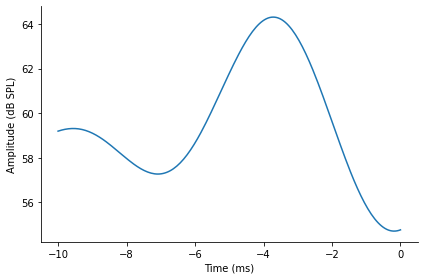

In [65]:
# before ploting let's make a negative time axis
sta_times = np.linspace(0,-window,n_bins)

plt.plot(sta_times, sta)

plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (dB SPL)')
sns.despine()
plt.tight_layout()

__Average of the stimulus wave-form preceding the emission of a spike in the neuron and can be thought of as the stimulus ‘preferred’ by this neuron.__

The code is adapted from http://nipy.org/nitime/examples/grasshopper.html.
